In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("haberman.data", low_memory=False, names=["Age", "Operation_Year", "Pos_Aux_Nodes", "Survival_Status"])
df.head()

,Age,Operation_Year,Pos_Aux_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop("Survival_Status", axis=1)
y = df["Survival_Status"]

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=1)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model = RandomForestClassifier(n_estimators=20, max_features="auto")
model.fit(X_train, y_train)
y_pred = model.predict(X_eval)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score

In [57]:
confusion_matrix(y_eval, y_pred)

array([[20,  4],
       [ 6,  1]])

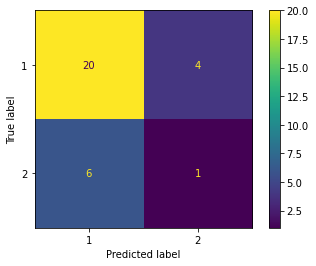

In [59]:
plot_confusion_matrix(model, X_eval, y_eval)

In [60]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.83      0.80        24
           2       0.20      0.14      0.17         7

    accuracy                           0.68        31
   macro avg       0.48      0.49      0.48        31
weighted avg       0.64      0.68      0.66        31



**Adjust Model**

In [14]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid= {  "n_estimators": [64, 70, 80, 85, 90, 95],
                "max_features": [2, 3],
                "criterion": ["gini", "entropy"],
                "bootstrap": [True, False],
                "oob_score": [False] 
            }


In [62]:
model = RandomForestClassifier()
grid_model = GridSearchCV(model, param_grid)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3],
                         'n_estimators': [64, 70, 80, 85, 90, 95],
                         'oob_score': [False]})

In [63]:
grid_model.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 3,
 'n_estimators': 70,
 'oob_score': False}

In [64]:
y_pred = grid_model.predict(X_eval)
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.67      0.71        24
           2       0.20      0.29      0.24         7

    accuracy                           0.58        31
   macro avg       0.48      0.48      0.47        31
weighted avg       0.64      0.58      0.60        31



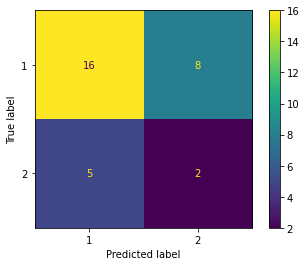

In [65]:
plot_confusion_matrix(grid_model, X_eval, y_eval)

In [66]:
roc_auc_score(y_eval, y_pred)

0.4761904761904762

#### Resampled Data

In [42]:
from sklearn.utils import resample

In [67]:
df_majority = df[df.Survival_Status == 1]
df_minority = df[df.Survival_Status == 2]

In [68]:
df_minority_upsampled = resample(df_minority, 
                                replace=True,     # sample with replacement
                                n_samples=180, 
                                random_state=123)

In [69]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.Survival_Status.value_counts()

1    225
2    180
Name: Survival_Status, dtype: int64

In [70]:
X = df_upsampled.drop("Survival_Status", axis=1)
y = df_upsampled["Survival_Status"]

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=1)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

In [71]:
param_grid= {  "n_estimators": [55, 60, 64, 68, 70],
                "max_features": [2, 3],
                "criterion": ["gini", "entropy"],
                "bootstrap": [True, False],
                "oob_score": [False] 
            }

model = RandomForestClassifier()
grid_model = GridSearchCV(model, param_grid)
grid_model.fit(X_train, y_train)

grid_model.best_params_





{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 2,
 'n_estimators': 60,
 'oob_score': False}

In [72]:
y_pred = grid_model.predict(X_eval)
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.78      0.82        18
           2       0.83      0.91      0.87        22

    accuracy                           0.85        40
   macro avg       0.85      0.84      0.85        40
weighted avg       0.85      0.85      0.85        40



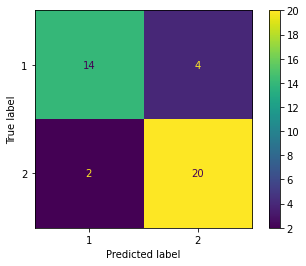

In [73]:
plot_confusion_matrix(grid_model, X_eval, y_eval)

In [74]:
roc_auc_score(y_eval, y_pred)

0.8434343434343434

#### Final Predictions

In [75]:
final_pred = grid_model.predict(X_test)

In [76]:
roc_auc_score(y_test, final_pred)

0.7306763285024154